In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

You can find the data here: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset

In [2]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [3]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [4]:
df.columns = ['Customer_ID', 'Gender', 'Age', 'City', 'Membership_Type',
       'Total_Spend', 'Items_Purchased', 'Average_Rating', 'Discount_Applied',
       'Days_Since_Last_Purchase', 'Satisfaction_Level']

In [5]:
df = df.drop(columns=['Customer_ID'])

In [6]:
df.shape

(350, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    350 non-null    object 
 1   Age                       350 non-null    int64  
 2   City                      350 non-null    object 
 3   Membership_Type           350 non-null    object 
 4   Total_Spend               350 non-null    float64
 5   Items_Purchased           350 non-null    int64  
 6   Average_Rating            350 non-null    float64
 7   Discount_Applied          350 non-null    bool   
 8   Days_Since_Last_Purchase  350 non-null    int64  
 9   Satisfaction_Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 25.1+ KB


In [8]:
df.describe()

,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000,4.019143,26.588571
std,4.870882,362.058695,4.155984,0.580539,13.440813
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,502.000000,9.000000,3.500000,15.000000
50%,32.500000,775.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


# Data Preprocessing

**Handling Missing data, Checking all features and applying any updateds to improve the data**

In [9]:
df.isnull().sum()

Gender                      0
Age                         0
City                        0
Membership_Type             0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Discount_Applied            0
Days_Since_Last_Purchase    0
Satisfaction_Level          2
dtype: int64

In [10]:
#because it's just two null values we can drop the two rows
df=df.dropna()

In [11]:
df['Gender'].value_counts()

Gender
Male      175
Female    173
Name: count, dtype: int64

In [12]:
df['Age'].value_counts()

Age
30    48
32    33
43    25
27    25
31    25
35    25
36    25
34    24
41    24
28    24
37    22
29    11
33    10
42     9
26     9
38     9
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

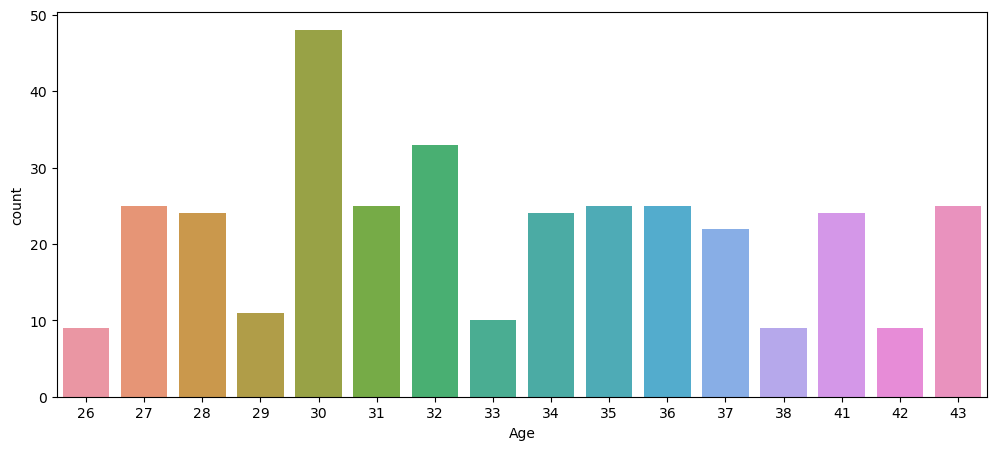

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(x ='Age', data=df)

In [14]:
df['City'].value_counts()

City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          56
Name: count, dtype: int64

In [15]:
df['Membership_Type'].value_counts()

Membership_Type
Gold      117
Silver    117
Bronze    114
Name: count, dtype: int64

In [16]:
df['Total_Spend'].value_counts()

Total_Spend
710.40     15
505.75     12
470.50     12
820.90     12
1140.60    11
           ..
530.40      1
1360.20     1
700.60      1
450.90      1
1120.20     1
Name: count, Length: 76, dtype: int64

C:\Users\ali20\AppData\Local\Temp\ipykernel_12060\2162864642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Spend'])


<Axes: xlabel='Total_Spend', ylabel='Density'>

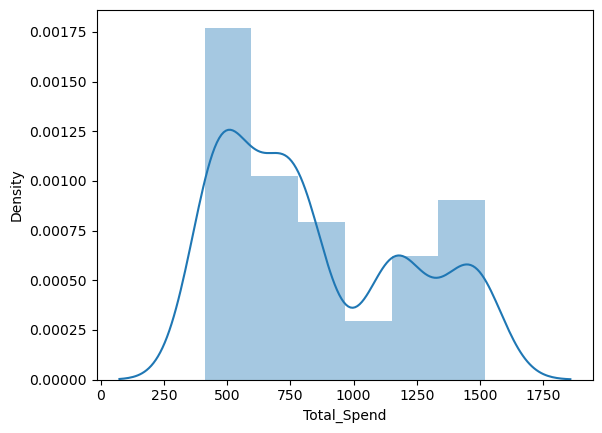

In [17]:
sns.distplot(df['Total_Spend'])

In [18]:
df['Items_Purchased'].value_counts()

Items_Purchased
10    47
9     34
8     33
12    33
13    32
11    28
15    24
21    24
16    24
7     23
20    19
14    11
18     9
19     6
17     1
Name: count, dtype: int64

C:\Users\ali20\AppData\Local\Temp\ipykernel_12060\205951646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Items_Purchased'])


<Axes: xlabel='Items_Purchased', ylabel='Density'>

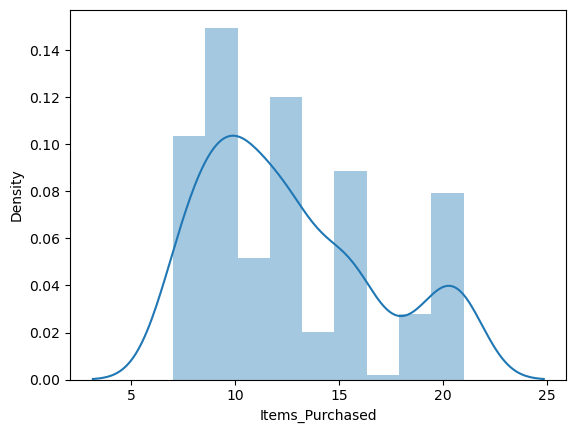

In [19]:
sns.distplot(df['Items_Purchased'])

In [20]:
df['Average_Rating'].value_counts()

Average_Rating
4.1    34
4.5    31
3.3    25
3.8    24
4.9    24
3.6    24
4.7    22
4.8    21
4.3    20
3.4    18
4.0    18
3.1    16
4.2    12
3.0    12
4.6    11
3.2    10
3.5     9
4.4     8
3.9     8
3.7     1
Name: count, dtype: int64

<Axes: xlabel='Average_Rating', ylabel='count'>

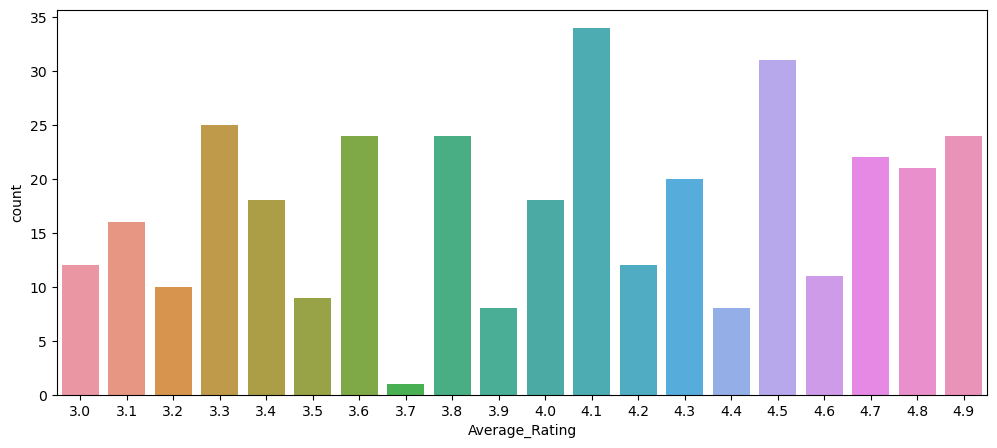

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(x ='Average_Rating', data=df)

In [22]:
df['Discount_Applied'].value_counts()

Discount_Applied
True     175
False    173
Name: count, dtype: int64

In [23]:
df['Days_Since_Last_Purchase'].value_counts()

Days_Since_Last_Purchase
13    20
12    17
10    17
19    16
39    16
14    13
18    12
22    11
15    11
24    11
20    11
23    10
27    10
17    10
9      9
38     9
47     9
40     9
26     9
32     9
21     9
37     8
33     8
54     8
25     6
11     6
28     6
53     5
16     5
41     4
42     4
46     3
35     3
34     3
48     3
29     3
55     2
45     2
30     2
36     2
43     2
31     2
44     2
63     1
62     1
61     1
60     1
56     1
59     1
58     1
57     1
52     1
50     1
49     1
Name: count, dtype: int64

C:\Users\ali20\AppData\Local\Temp\ipykernel_12060\3430083944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Days_Since_Last_Purchase'])


<Axes: xlabel='Days_Since_Last_Purchase', ylabel='Density'>

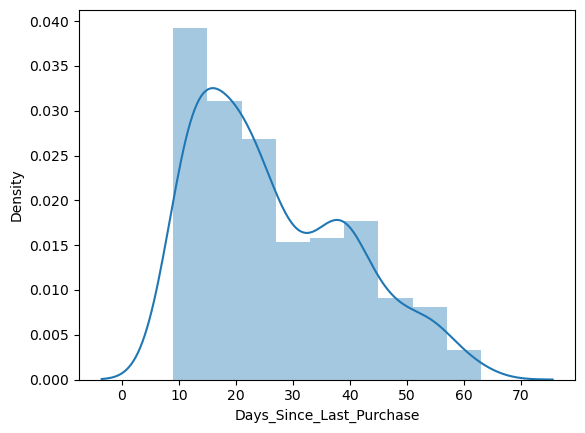

In [24]:
sns.distplot(df['Days_Since_Last_Purchase'])

In [25]:
df['Satisfaction_Level'].value_counts()

Satisfaction_Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

**WE notice that data is good and ready to work with**

In [26]:
df.isnull().sum()

Gender                      0
Age                         0
City                        0
Membership_Type             0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Discount_Applied            0
Days_Since_Last_Purchase    0
Satisfaction_Level          0
dtype: int64

In [27]:
df.shape

(348, 10)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    348 non-null    object 
 1   Age                       348 non-null    int64  
 2   City                      348 non-null    object 
 3   Membership_Type           348 non-null    object 
 4   Total_Spend               348 non-null    float64
 5   Items_Purchased           348 non-null    int64  
 6   Average_Rating            348 non-null    float64
 7   Discount_Applied          348 non-null    bool   
 8   Days_Since_Last_Purchase  348 non-null    int64  
 9   Satisfaction_Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 27.5+ KB


In [29]:
#copy the data
X = df.copy()

# Casting (data type conversion)

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
objects = ['Gender','City','Membership_Type','Discount_Applied','Satisfaction_Level']
for i in objects:
    X[i] = encoder.fit_transform(X[i])

# Correlation

In [31]:
X.corr()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
Gender,1.000000,-0.581774,0.483359,0.807679,0.387471,0.439175,0.492687,-0.344872,-0.214256,0.010589
Age,-0.581774,1.000000,-0.876826,-0.652237,-0.676826,-0.684397,-0.721752,0.061262,0.170437,0.007227
City,0.483359,-0.876826,1.000000,0.472328,0.921276,0.891535,0.887721,-0.099413,-0.403373,-0.013901
Membership_Type,0.807679,-0.652237,0.472328,1.000000,0.302370,0.302532,0.504575,-0.010643,-0.042688,0.021701
Total_Spend,0.387471,-0.676826,0.921276,0.302370,1.000000,0.972276,0.941190,-0.168530,-0.544679,-0.045252
Items_Purchased,0.439175,-0.684397,0.891535,0.302532,0.972276,1.000000,0.921396,-0.123037,-0.425425,0.084417
Average_Rating,0.492687,-0.721752,0.887721,0.504575,0.941190,0.921396,1.000000,-0.076756,-0.435921,0.006135
Discount_Applied,-0.344872,0.061262,-0.099413,-0.010643,-0.168530,-0.123037,-0.076756,1.000000,0.760032,0.800748
Days_Since_Last_Purchase,-0.214256,0.170437,-0.403373,-0.042688,-0.544679,-0.425425,-0.435921,0.760032,1.000000,0.716017
Satisfaction_Level,0.010589,0.007227,-0.013901,0.021701,-0.045252,0.084417,0.006135,0.800748,0.716017,1.000000


<Axes: >

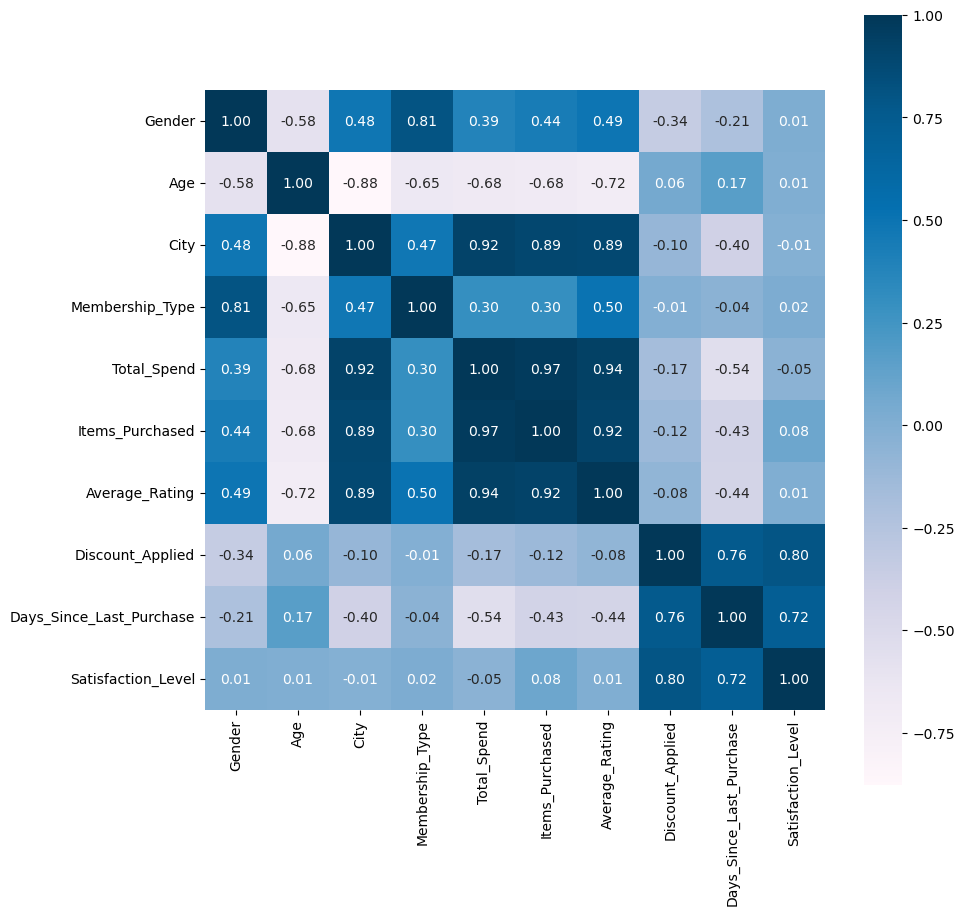

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), cmap="PuBu", square = True, annot=True, fmt='.2f')

# Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modeling

In [35]:
from sklearn.cluster import KMeans

C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

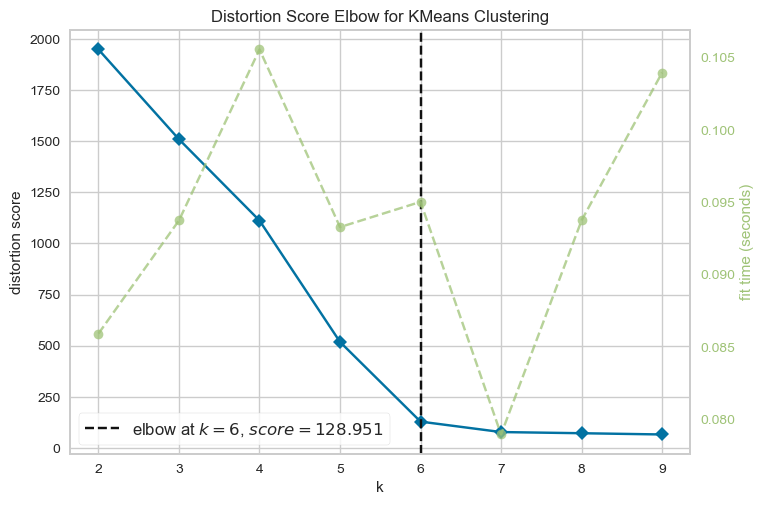

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
#elbow mrthod
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(X)        
visualizer.show() 

C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

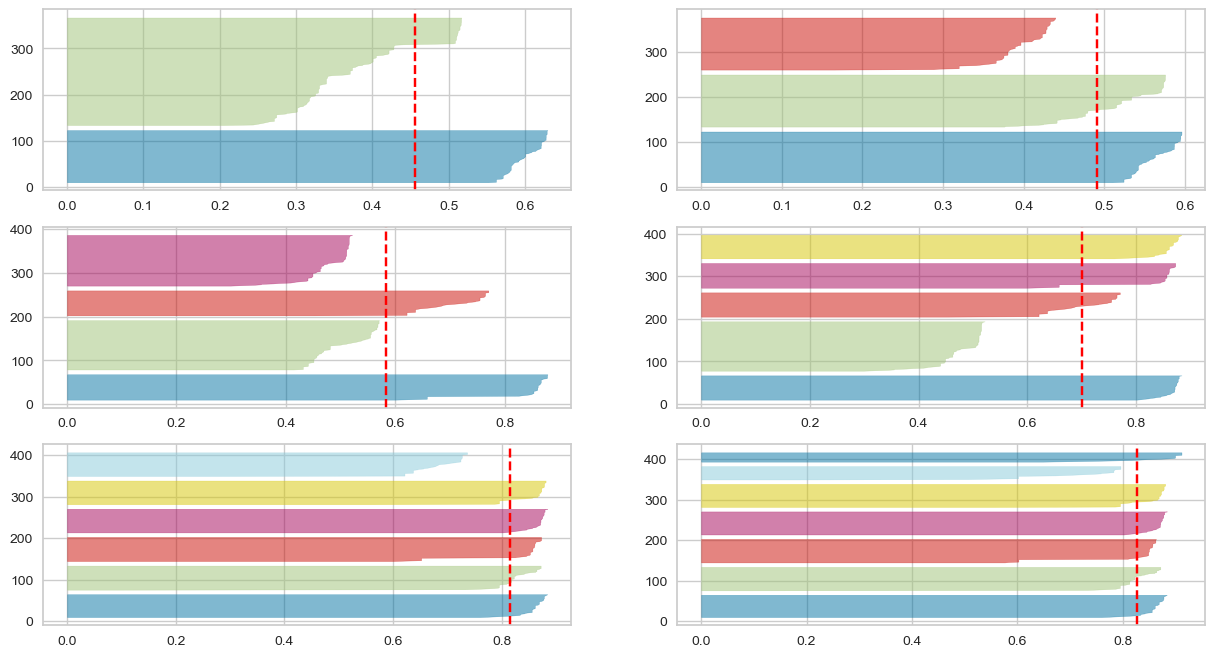

In [55]:
#Silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=2, the silhouette score is 0.45523866437984517
For n_clusters=3, the silhouette score is 0.4385631750861477
For n_clusters=4, the silhouette score is 0.5446277092091376
For n_clusters=5, the silhouette score is 0.6894576076077855
For n_clusters=6, the silhouette score is 0.814481534942226


C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=7, the silhouette score is 0.827086872137015
For n_clusters=8, the silhouette score is 0.7784482005702994


C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


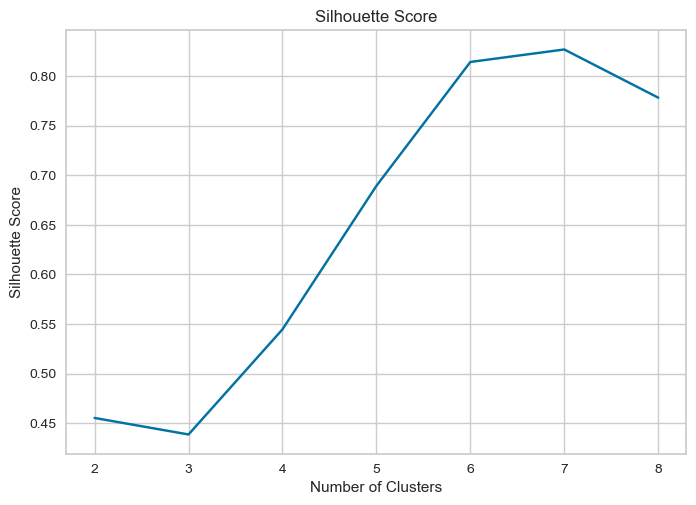

In [73]:
#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 9):  # Testing from 2 to 8 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

plt.plot(range(2, 9), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [95]:
k = 6 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\ali20\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [96]:
# Predict clusters on training and testing data
train_cluster_labels = kmeans.predict(X)

In [97]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute silhouette score
silhouette = silhouette_score(X, train_cluster_labels)
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X, train_cluster_labels)
print("Davies–Bouldin Index:", davies_bouldin)

# Access Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)


Silhouette Score: 0.814481534942226
Davies–Bouldin Index: 0.3323866596289529
Within-Cluster Sum of Squares (WCSS): 128.950966525868


In [98]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-1.00576374,  0.64028658, -0.88593377, -1.23804325, -1.10790572,
        -1.21805676, -1.43952016, -1.00576374, -0.28458724, -1.28219161],
       [-0.97186487, -0.58832188,  0.87245949, -0.01058157,  0.87836876,
         0.63742213,  0.90004111,  0.99426929, -0.15025386, -0.03232416],
       [ 0.99426929,  0.11107714, -0.29980268,  1.21688012, -0.11712298,
        -0.23048085,  0.2581965 , -1.00576374, -0.84306499, -1.11271806],
       [-1.00576374,  1.73262939, -1.47206485, -1.23804325, -0.96328073,
        -0.77736701, -0.97986323,  0.99426929,  1.02937109,  1.21754329],
       [ 0.99426929, -0.91498406,  1.45859058, -0.01058157,  1.69442469,
         1.77961519,  1.35749814, -1.00576374, -1.1476847 , -0.03232416],
       [ 0.95978597, -0.95037996,  0.2863284 ,  1.21688012, -0.43581259,
        -0.24015088, -0.16596061,  0.99426929,  1.40353254,  1.21754329]])

In [99]:
df['Cluster_ID'] = train_cluster_labels

In [100]:
#naming the clusters
df['Cluster_ID'] = df['Cluster_ID'].replace([0,1,2,3,4,5], ['Cluster_1', 'Cluster_2','Cluster_3','Cluster_4','Cluster_5','Cluster_6'])

In [101]:
df['Cluster_ID'].value_counts()

Cluster_ID
Cluster_2    59
Cluster_3    59
Cluster_4    58
Cluster_5    58
Cluster_6    58
Cluster_1    56
Name: count, dtype: int64

# **Clusters Predictions**

In [102]:
pd.crosstab(df['Cluster_ID'],df['Gender'])

Gender,Female,Male
Cluster_ID,,
Cluster_1,56,0
Cluster_2,58,1
Cluster_3,0,59
Cluster_4,58,0
Cluster_5,0,58
Cluster_6,1,57


In [103]:
pd.crosstab(df['Cluster_ID'],df['Membership_Type'])

Membership_Type,Bronze,Gold,Silver
Cluster_ID,,,
Cluster_1,56,0,0
Cluster_2,0,59,0
Cluster_3,0,0,59
Cluster_4,58,0,0
Cluster_5,0,58,0
Cluster_6,0,0,58


C:\Users\ali20\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


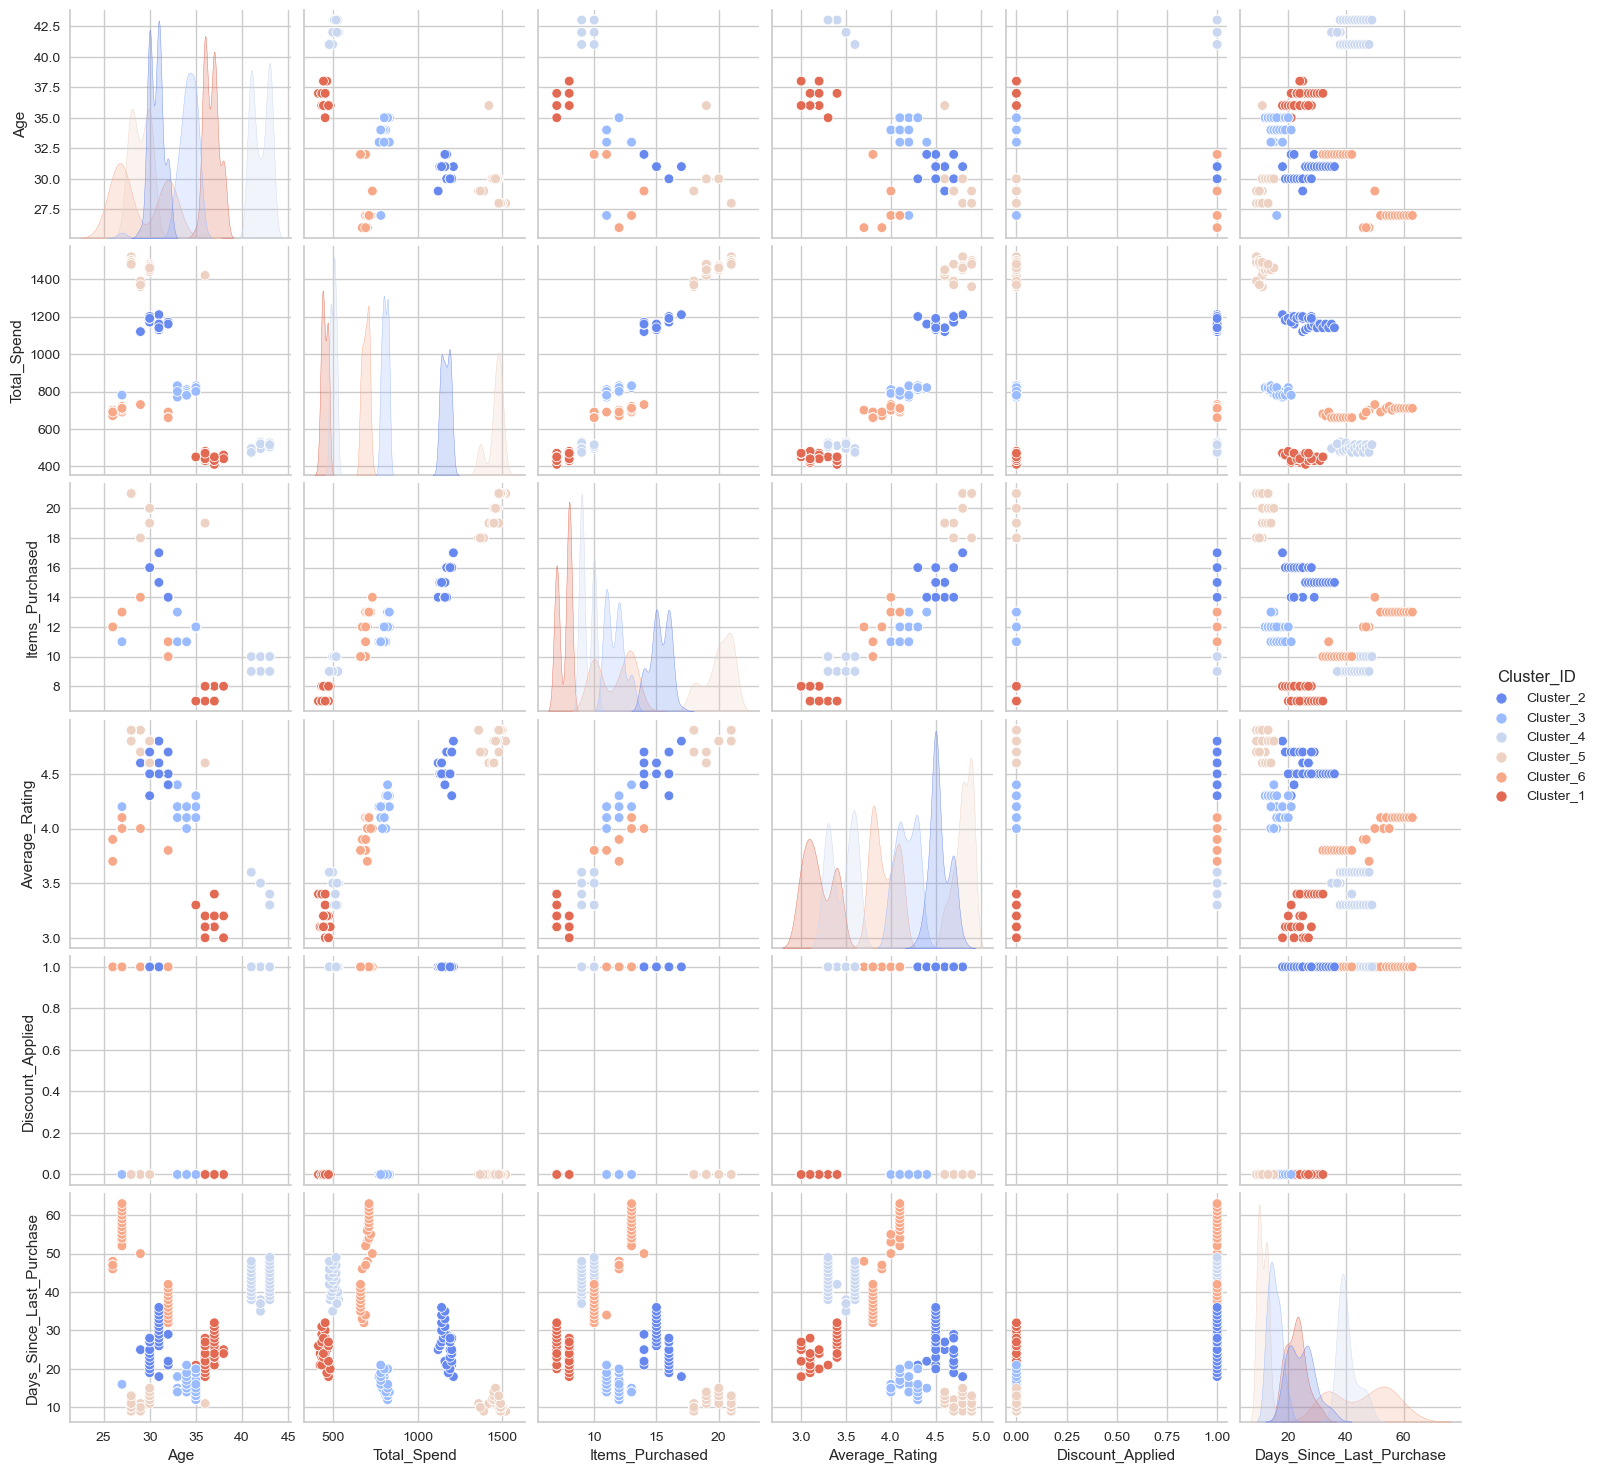

In [104]:
sns.pairplot(df,hue='Cluster_ID',palette='coolwarm') 

<Axes: xlabel='Days_Since_Last_Purchase', ylabel='Total_Spend'>

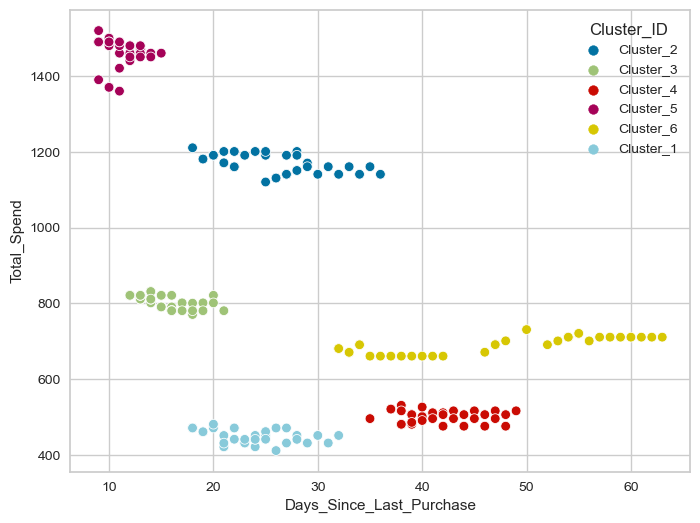

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Days_Since_Last_Purchase', y='Total_Spend', hue='Cluster_ID')

<Axes: xlabel='Cluster_ID', ylabel='Days_Since_Last_Purchase'>

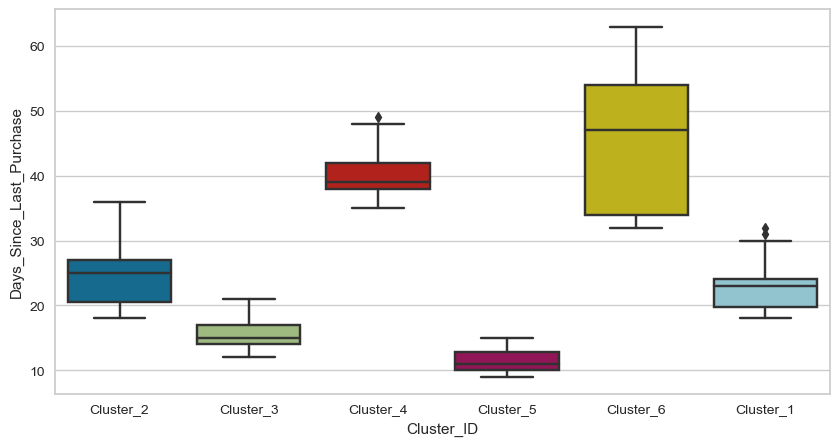

In [106]:
plt.figure(figsize=(10, 5))
sns.boxplot(x ='Cluster_ID', y ='Days_Since_Last_Purchase', data=df)

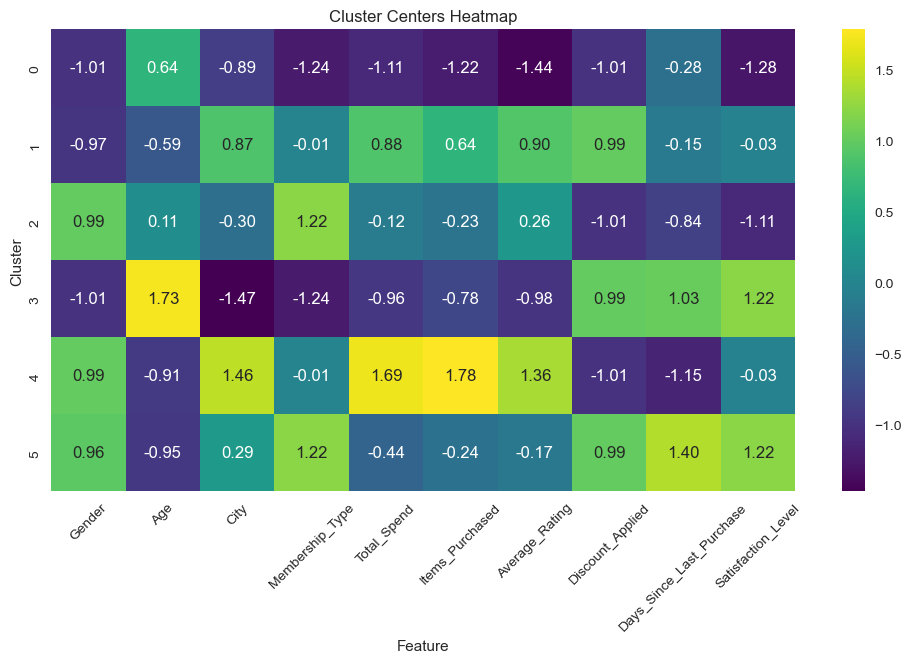

In [107]:
# Cluster Centers Heatmap
feature_names = df.drop('Cluster_ID', axis=1).columns

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers, annot=True, cmap='viridis', fmt=".2f", xticklabels=feature_names)
plt.title('Cluster Centers Heatmap')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.xticks(rotation=45)  
plt.show()


<Figure size 1200x600 with 0 Axes>

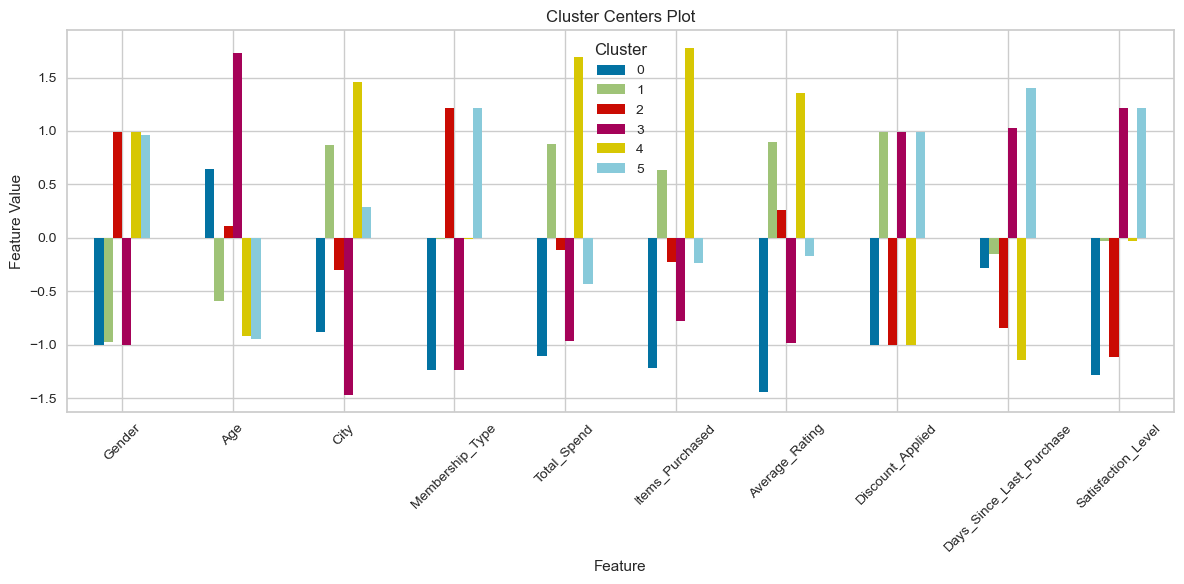

In [108]:
#Cluster Centers Plot
feature_names = df.drop('Cluster_ID', axis=1).columns

# Create DataFrame with cluster centers and feature names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=feature_names)

plt.figure(figsize=(12, 6))
cluster_centers_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Centers Plot')
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)  
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [109]:
df

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level,Cluster_ID
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,Cluster_2
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,Cluster_3
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,Cluster_4
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,Cluster_5
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,Cluster_6
...,...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,Cluster_6
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,Cluster_1
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,Cluster_2
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,Cluster_3
